In [1]:

import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import tifffile as tff
from skimage.segmentation import mark_boundaries


In [9]:
# Load sparse Stardist mask
data = np.load('/home/marco/Downloads/media/marco/mountstuff/rfl_test/cellpose_expanded.npz')
row = data['row']
col = data['col']
vals = data['data']
shape = data['shape']
mask_sparse = coo_matrix((vals, (row, col)), shape=shape)
labels = mask_sparse.toarray()


In [3]:
# Load raw DAPI or fluorescence image
image_wh = tff.imread("/home/marco/Downloads/media/marco/mountstuff/rfl_test/preprocessing/stitched/Round0_4.tif")


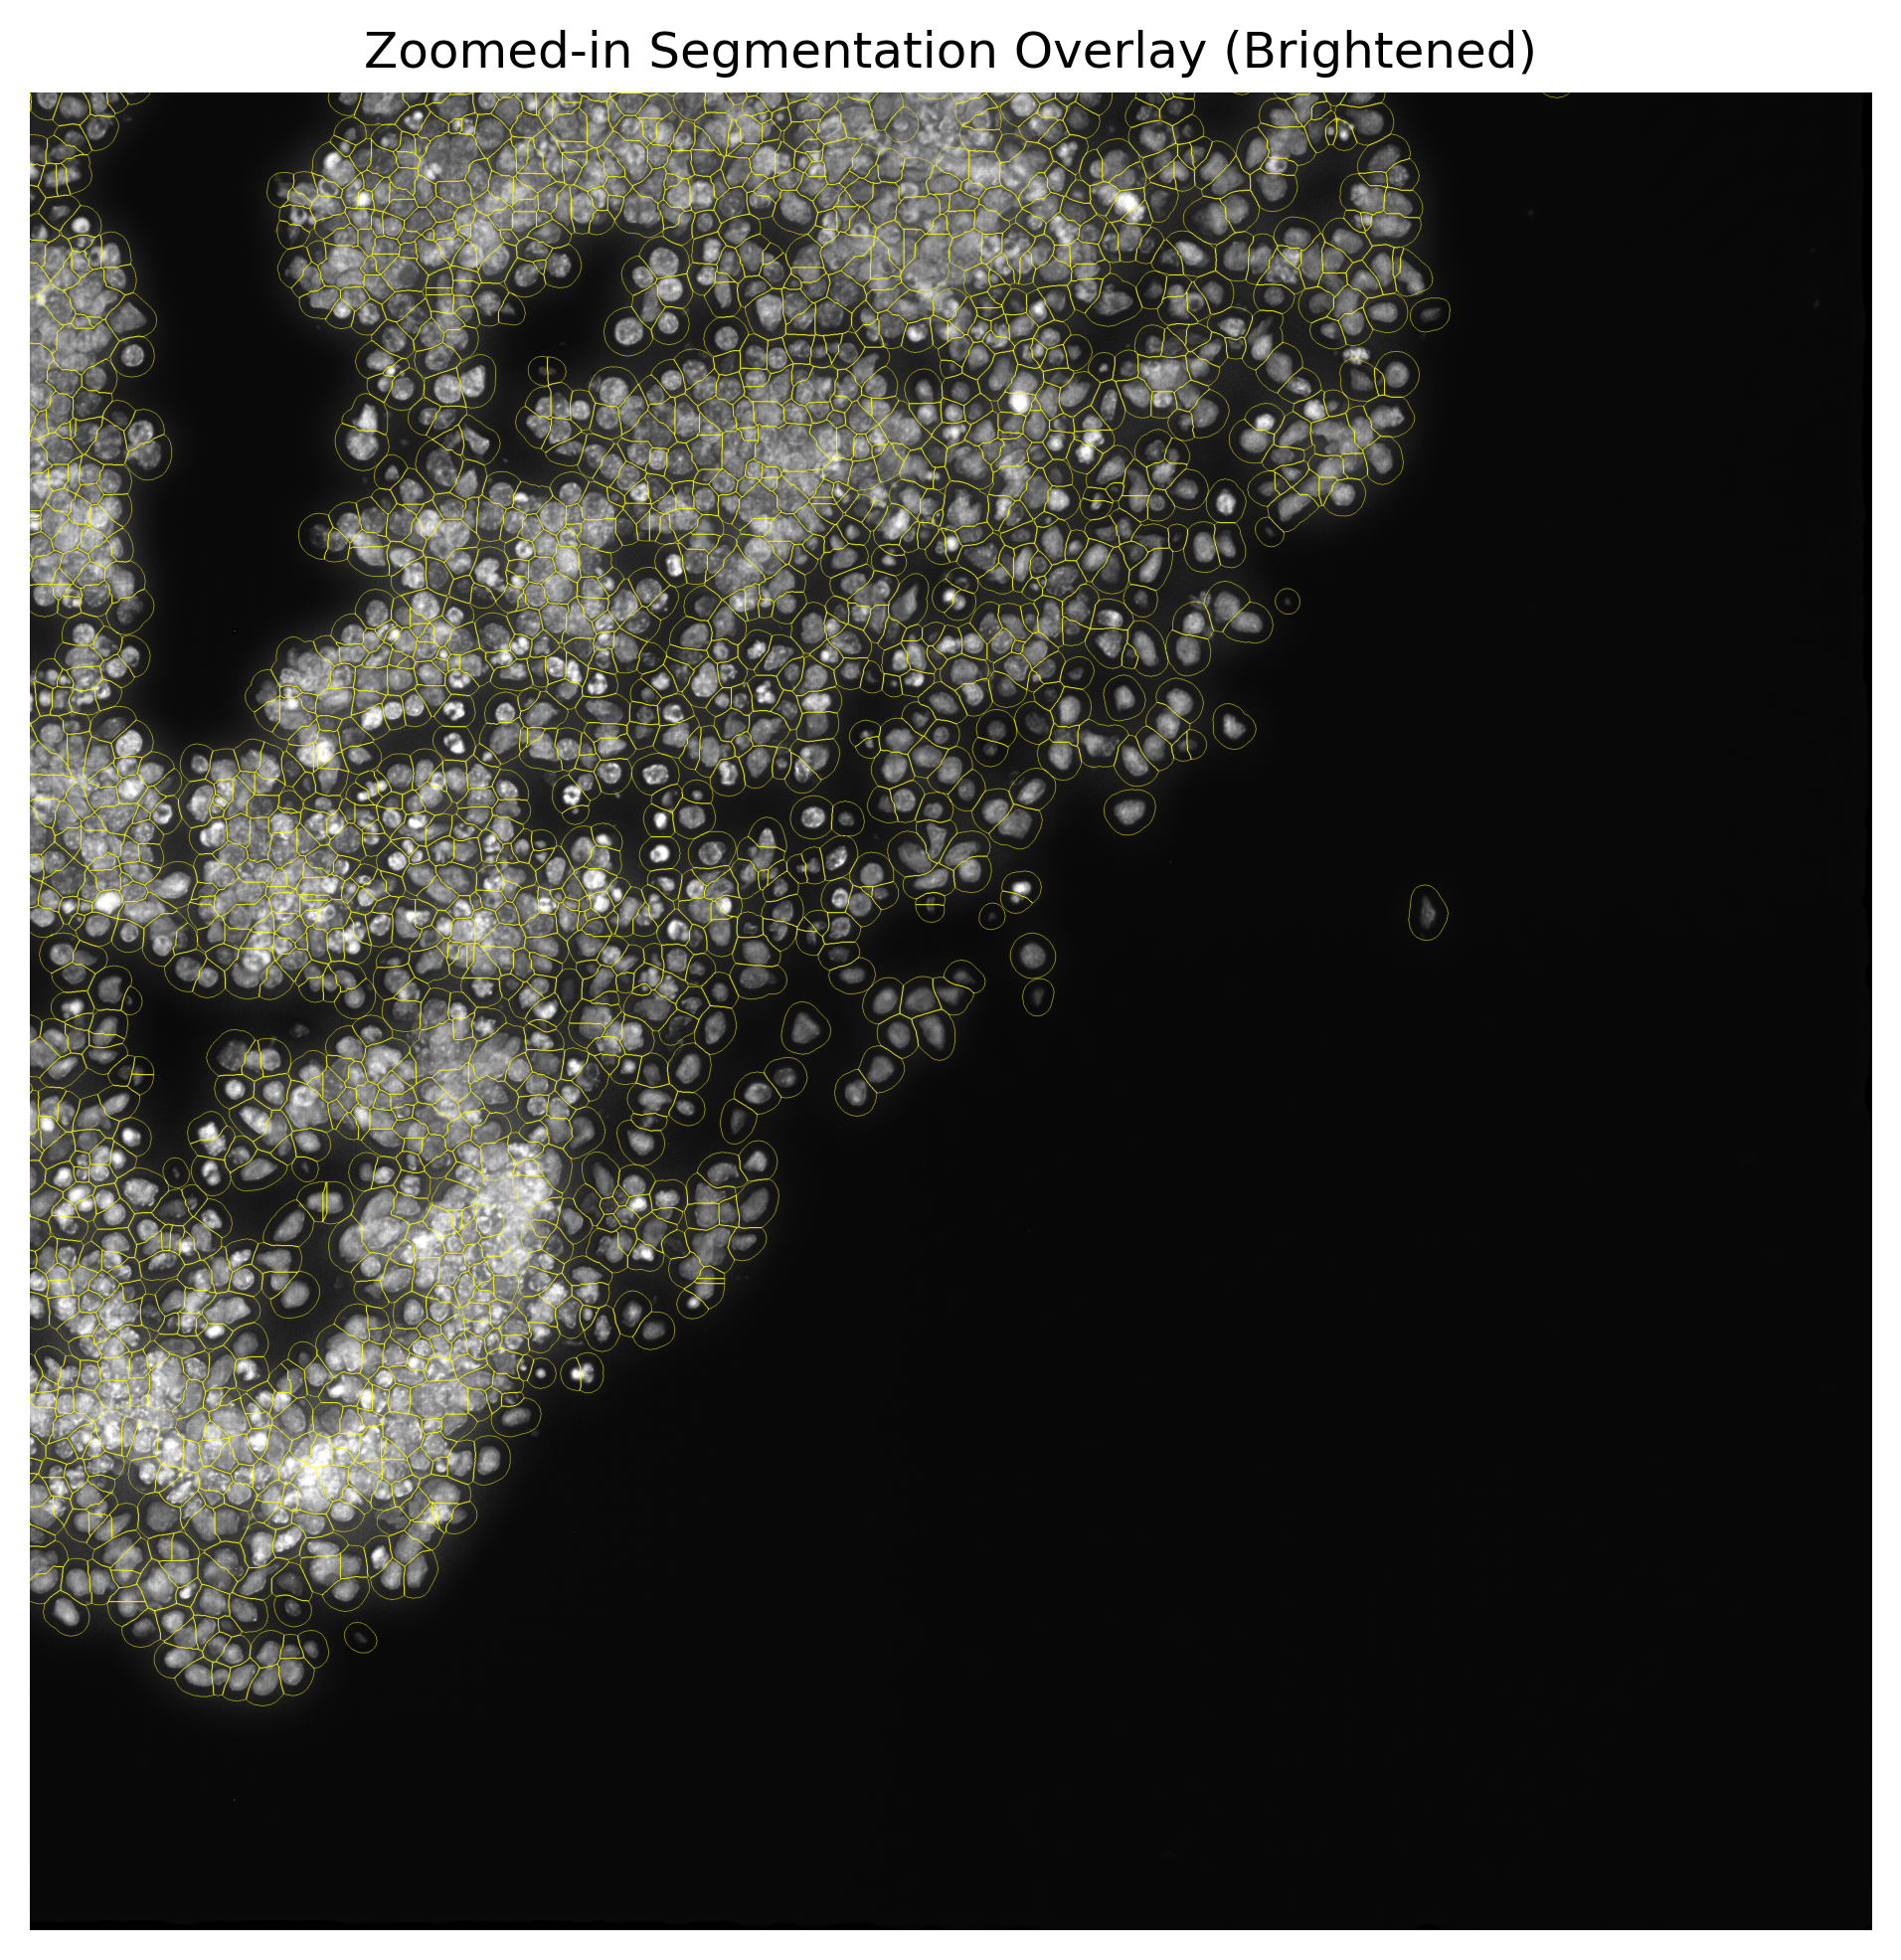

In [10]:
# Define crop region (known to contain labels)
y_start, y_end = 4000, 8000
x_start, x_end = 4000, 8000
# Crop both image and labels
image_crop = image_wh[y_start:y_end, x_start:x_end]
labels_crop = labels[y_start:y_end, x_start:x_end]
# Normalize and brighten image
image_min = image_crop.min()
image_max = image_crop.max()
image_range = image_max - image_min if image_max > image_min else 1
image_norm = (image_crop - image_min) / image_range
brightness_factor = 4
image_bright = np.clip(image_norm * brightness_factor, 0, 1)
# Overlay boundaries
overlay = mark_boundaries(image_bright, labels_crop, color=(1, 1, 0), mode='outer', background_label=0)
# Plot
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(overlay)
plt.title("Zoomed-in Segmentation Overlay (Brightened)")
plt.axis('off')
plt.show()

In [28]:
from skimage.segmentation import find_boundaries
from scipy.ndimage import binary_dilation

# Step 1: Find the outer boundaries
contour = find_boundaries(labels, mode='outer')

# Step 2: Thicken the boundaries by dilation
from skimage.morphology import disk
thick_contour = binary_dilation(contour, structure=disk(2))  # increase radius for more thickness

# Convert to 8-bit image
contour_image = (thick_contour.astype(np.uint8)) * 255


In [30]:
imwrite('/home/marco/Downloads/media/marco/mountstuff/rfl_test/cellpose_contour_mask.tif', contour_image)